In [87]:
# Carga de bibliotecas
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import sklearn.preprocessing as skpp



# Carga de dados
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/mtcars.csv")

<Axes: xlabel='wt', ylabel='mpg'>

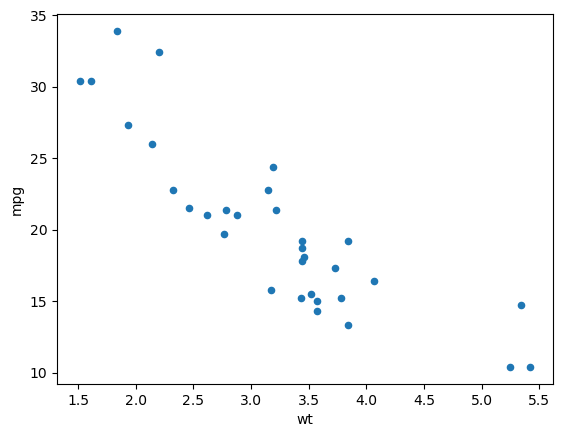

In [2]:
# Gráfico de dispersão
df.plot.scatter(x='wt', y='mpg')

In [3]:
# Execução do K-Means
k = KMeans(n_clusters=8, random_state=2).fit(df[['wt', 'mpg']])

c:\Users\alyss\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='wt', ylabel='mpg'>

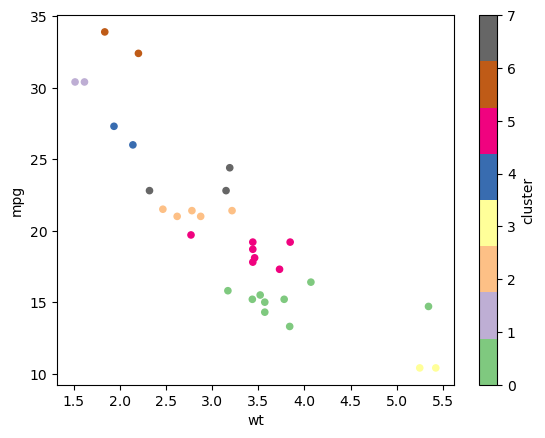

In [4]:
# Visualização dos clusters
df['cluster'] = k.labels_
df.plot.scatter(x='wt', y='mpg', c='cluster', colormap='Accent')

c:\Users\alyss\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='wt_t', ylabel='mpg'>

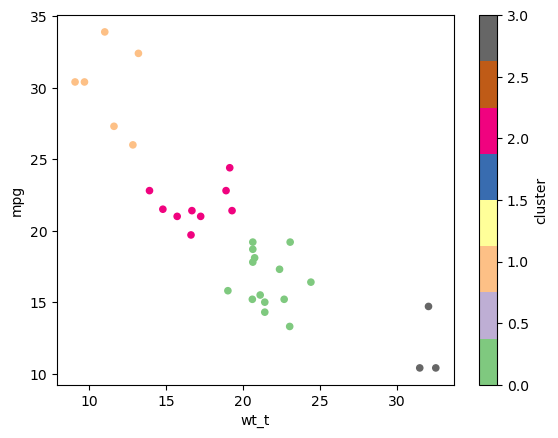

In [5]:
# 1.a ideia - colocar ambas variáveis na mesma ordem de grandeza
# ajuste de escala "manual"
df['wt_t'] = df['wt'] * 6

# Execução do K-Means
k = KMeans(n_clusters=4, random_state=2).fit(df[['wt_t', 'mpg']])
df['cluster'] = k.labels_
df.plot.scatter(x='wt_t', y='mpg', c='cluster', colormap='Accent')

c:\Users\alyss\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='wt_01', ylabel='mpg_01'>

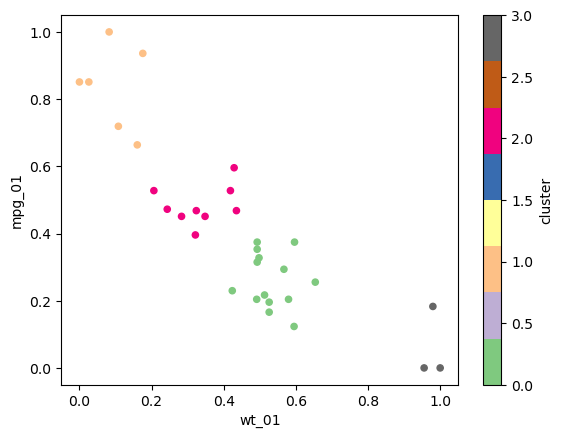

In [6]:
# 2.a ideia - "padronizar" escalas de variáveis
# normalização - ajustes de escala (tipos)
scaler = MinMaxScaler(feature_range=(0,1))
df['wt_01'] = scaler.fit_transform(df[['wt']])
df['mpg_01'] = scaler.fit_transform(df[['mpg']])

# Execução do K-Means
k = KMeans(n_clusters=4, random_state=2).fit(df[['wt_01', 'mpg_01']])
df['cluster'] = k.labels_
df.plot.scatter(x='wt_01', y='mpg_01', c='cluster', colormap='Accent')

In [8]:
#visualizando algumas linhas
df[['wt', 'mpg', 'cluster']].head()

,wt,mpg,cluster
0,2.620,21.0,2
1,2.875,21.0,2
2,2.320,22.8,2
3,3.215,21.4,2
4,3.440,18.7,0


In [10]:
# análise de correlação

df[['wt', 'mpg']].corr()

,wt,mpg
wt,1.000000,-0.867659
mpg,-0.867659,1.000000


<Axes: xlabel='wt_log', ylabel='mpg'>

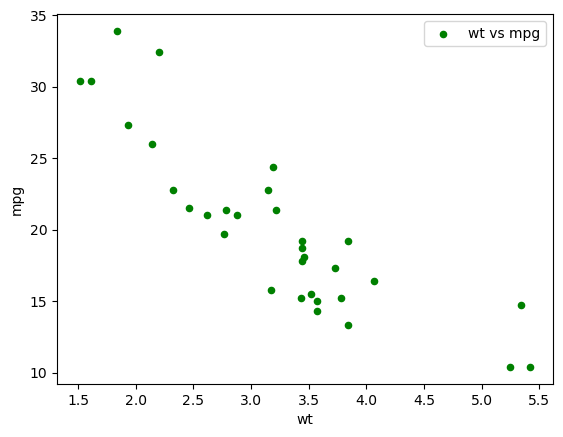

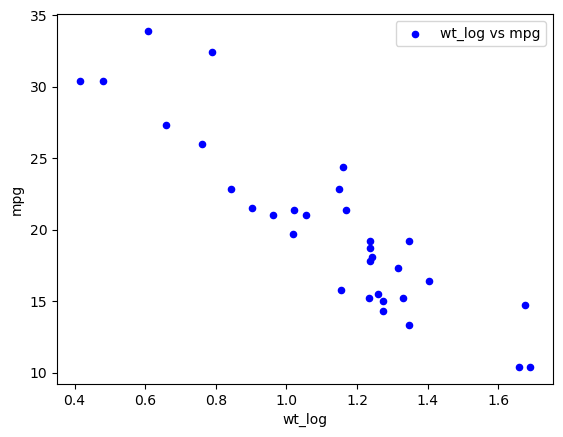

In [39]:
df['wt_log'] = np.log(df['wt'])
df[['wt_log', 'mpg']].corr()
#plotar grafico de dispersão com os dados de wt e wt_log com cores diferentes para comparacao
df.plot.scatter(x='wt', y='mpg', color='green', label='wt vs mpg')
df.plot.scatter(x='wt_log', y='mpg', color='blue', label='wt_log vs mpg')


In [60]:
# Separação treino e teste (split)
x_treino, x_teste, y_treino, y_teste = train_test_split(df[['wt']], df['mpg'], test_size=0.25, random_state=1)

# transformacao polinomial



# Regressão Linear
mod = LinearRegression()
mod.fit(x_treino, y_treino)

# R2
mod.score(x_teste, y_teste)


0.705474164043128

In [57]:
y_prev = mod.predict(x_teste)
print(y_teste, y_prev)


27    30.4
3     21.4
22    15.2
18    30.4
23    13.3
17    32.4
21    15.5
28    15.8
Name: mpg, dtype: float64 [28.10569085 20.1596594  19.13255781 27.6294892  17.24175714 24.89833268
 18.7357231  20.36974837]


In [58]:
print(mean_squared_error(y_teste, y_prev))

#o resultado significa que ele erra cerca de 4 galoes, (esta em quadrado)
#para tirar a raiz quadrada

16.638500787793586


<Axes: xlabel='wt', ylabel='mpg'>

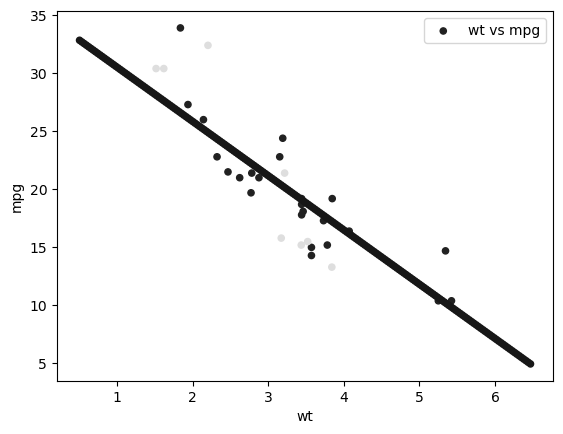

In [86]:
#visualizacao grafica do modelo e impacros do feature apos transformacao das variaveis

dfp = x_treino.copy()
dfp['mpg'] = y_treino
dfp['sample'] = '0.13'  # cor difrente para treino e teste 


dft = x_teste.copy()
dft['mpg'] = y_teste
dft['sample'] = '0.87'  # cor difrente para treino e teste

dfp = pd.concat([dfp, dft])

# geracao da curva de regressao
x_fit = np.arange(0.5, 6.5, 0.03)
dff = pd.DataFrame({ 'wt': x_fit})
x_fit = dff
y_fit = mod.predict(x_fit)

dff['mpg']= y_fit
dff['sample'] = '0.09'

dfp = pd.concat([dfp, dff])

#plotar grafico de dispersão com os dados de wt e wt_log com cores diferentes para comparacao
dfp.plot.scatter(x='wt', y='mpg', color=dfp['sample'].tolist(), label='wt vs mpg')
